In [5]:
# start off with our basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# first questions have to do with our Iris dataset

In [8]:
df = sns.load_dataset('iris')

In [9]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

    What does the distribution of petal lengths look like?
 

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

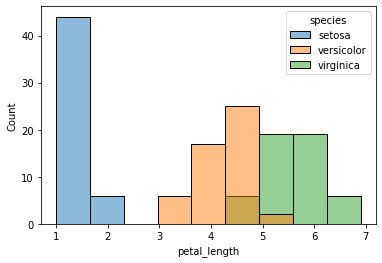

In [11]:
sns.histplot(data=df, x='petal_length', hue='species')

   
    Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

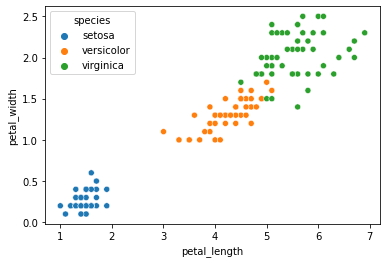

In [13]:
sns.scatterplot(data=df,
                x='petal_length',
                y='petal_width',
               hue='species')

   
Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

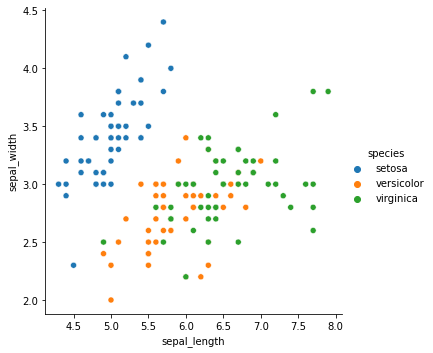

In [15]:
sns.relplot(data=df,
                x='sepal_length',
                y='sepal_width',
               hue='species')

    
    Which features would be best used to predict species?

 - Through cursory examination of the two plots that we mapped out here, we can say reasonably that petal length and width are stronger predictors of species than sepal length and sepal width

    Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [17]:
anscombe = sns.load_dataset('anscombe')

In [19]:
anscombe.dataset.value_counts()

I      11
III    11
II     11
IV     11
Name: dataset, dtype: int64

In [21]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [22]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


    Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

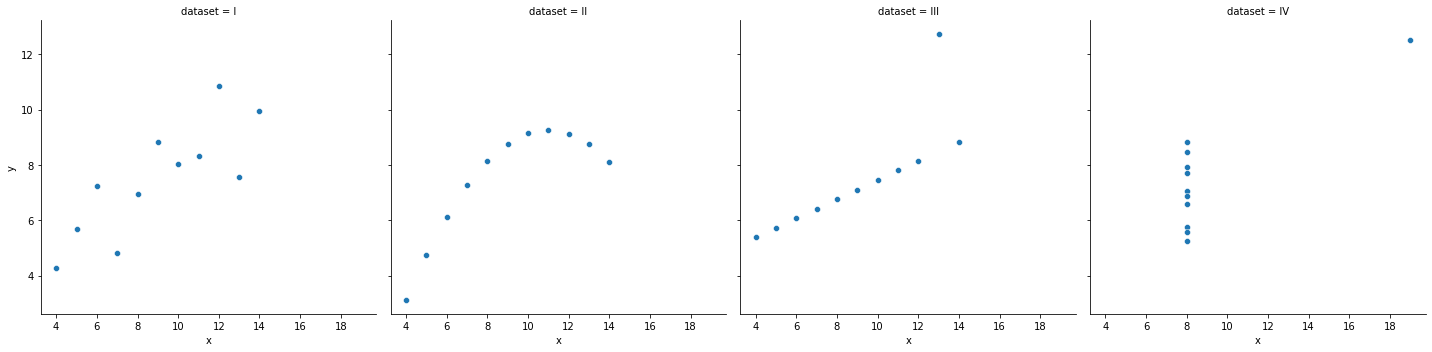

In [23]:
sns.relplot(data=anscombe, x='x',y='y',col='dataset')

    Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [25]:
from pydataset import data

In [27]:
bugs = data('InsectSprays')

In [29]:
type(data('InsectSprays', show_doc=True))

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

NoneType

In [30]:
bugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [31]:
bugs.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [32]:
# I have a potential x and y here for a box plot:
# count, the thing I want to plot for each box,
# and spray, which will designate an individual plot

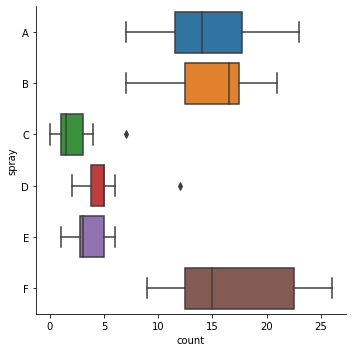

In [35]:
sns.catplot(data=bugs, x='count', y='spray', kind='box')
# sns.boxplot(data=bugs, x='count', y='spray')

    Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
    

In [37]:
swiss = data('swiss')

In [38]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [39]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [40]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


  Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [43]:
swiss['is_catholic'] = swiss.Catholic > 50

In [44]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.7+ KB


        
        Does whether or not a province is Catholic influence fertility?
        

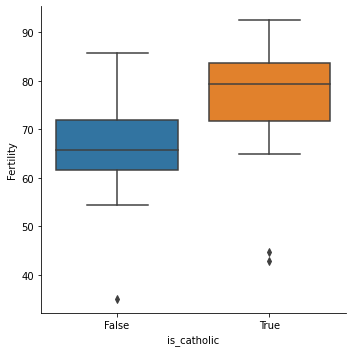

In [45]:
# box plot!
sns.catplot(data=swiss,
            x='is_catholic',
            y='Fertility',
           kind='box')

        What measure correlates most strongly with fertility?

<AxesSubplot:>

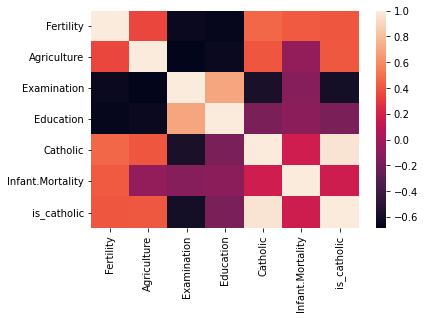

In [49]:
sns.heatmap(swiss.corr())

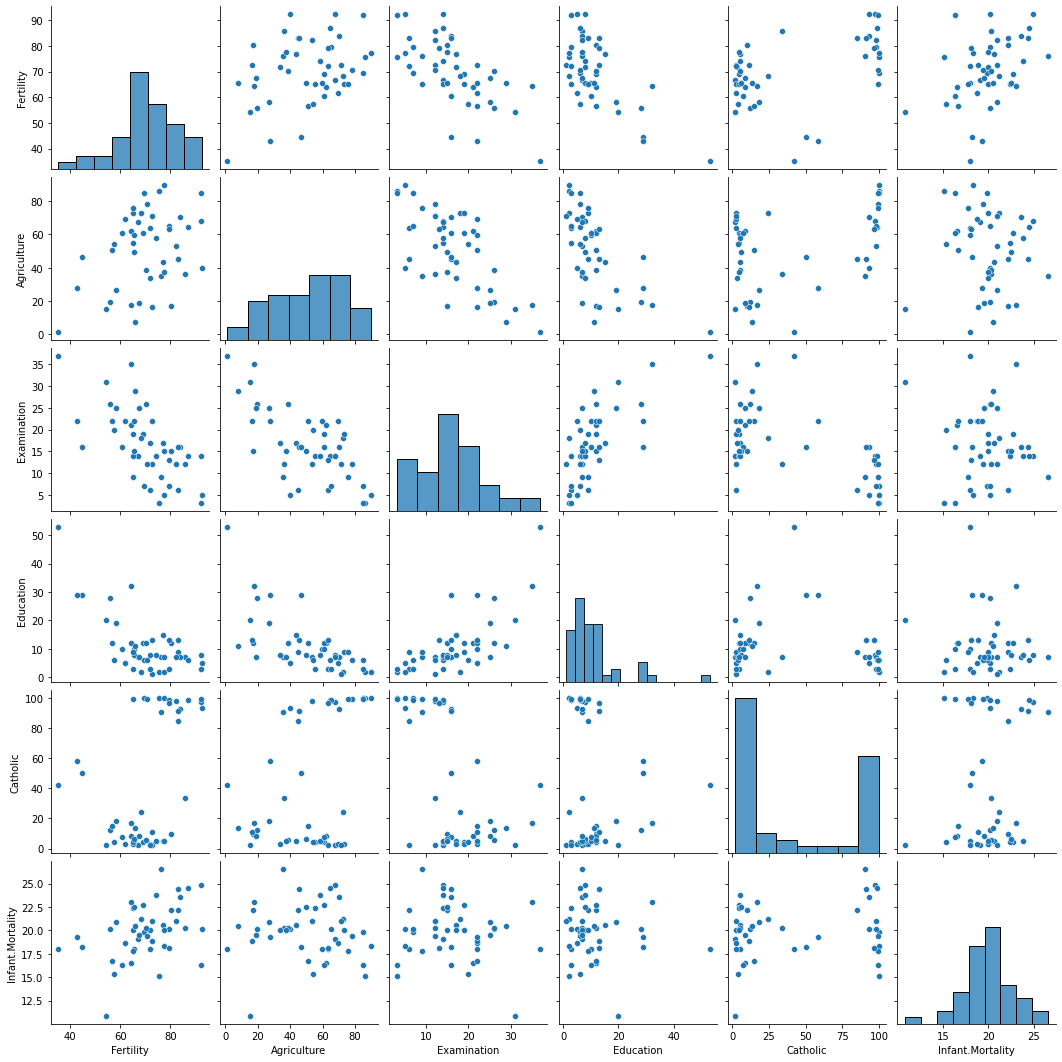

In [47]:
sns.pairplot(data=swiss.drop(columns='is_catholic'))

    Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [51]:
# function to grab my creentials from sql and connect to the db
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# grab my formatted url and use the chipotle schema
url = get_db_url('chipotle')
# I'm not going to return the url here so it doesnt print
# my credentials in plaintext!!
# define our query:
query = "SELECT * FROM orders"
# assign orders to the table we get from the query:
orders = pd.read_sql(query, url)
# peek at the orders table, which is now a dataframe:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [52]:
orders[orders['item_name'] == 'Chicken Bowl']

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
13,14,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]",$11.25
19,20,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettu...",$8.75
26,27,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Beans, Rice, Fajita Veggies, Cheese, Sour C...",$8.49
...,...,...,...,...,...,...
4590,4591,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Lettuce, Guacamole]]",$11.25
4591,4592,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce]]",$8.75
4595,4596,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans]]",$8.75
4599,4600,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",$8.75


In [53]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [54]:
orders['item_price'] = orders.item_price.str.replace('$','').astype(float)

<ipython-input-54-91e4cdb95ec8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$','').astype(float)


In [55]:
orders['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [56]:
# our definition of popular
# suggests the items that are ordered most often,
# which may or may not be the same as the items
# that generate the most gross revenue

In [58]:
orders.head(2)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39


In [64]:
top_items = orders.groupby(
    'item_name').quantity.sum(
).sort_values(
    ascending=False).head(4)

In [68]:
my_top_items = list(top_items.index)

In [70]:
orders_top = orders[orders.item_name.isin(my_top_items)]

In [71]:
orders.columns

Index(['id', 'order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [79]:
orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(4)

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [87]:
summed_orders = orders_top.groupby('item_name')\
.item_price.sum().reset_index()

In [88]:
summed_orders 

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


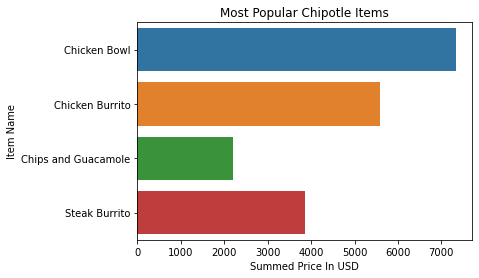

In [89]:
sns.barplot(data=summed_orders,
           y='item_name',
           x='item_price')
plt.title('Most Popular Chipotle Items')
plt.ylabel('Item Name')
plt.xlabel('Summed Price In USD')
plt.show()

    Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [90]:
sleepers = data('sleepstudy')

In [91]:
sleepers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [94]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [92]:
sleepers.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [99]:
# let's force seaborn to interpret subjects
# less numerically:
sleepers['subject_cat'] = 'Subject: ' + sleepers.Subject.astype(str)

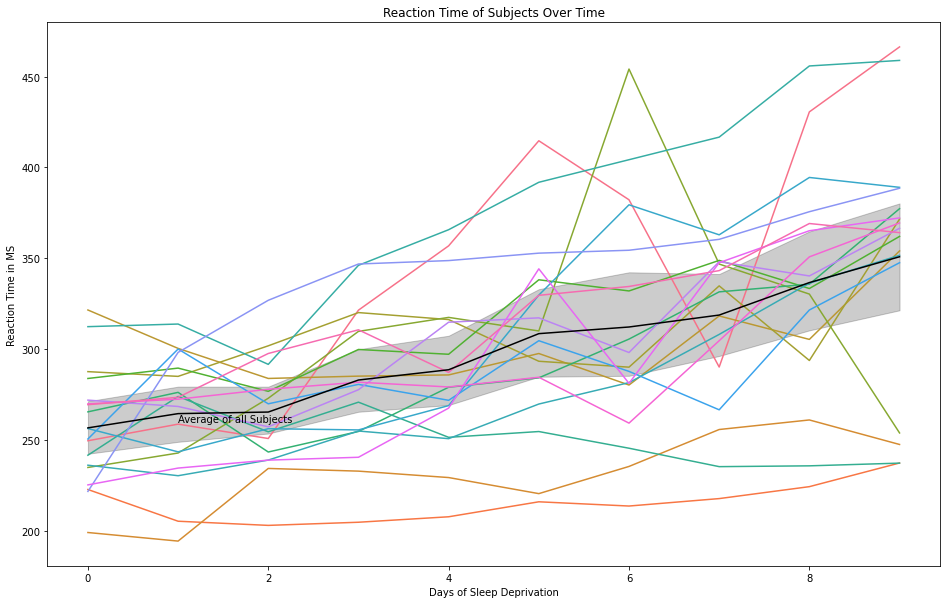

In [112]:
plt.figure(figsize=(16,10))
# if we have two axis level plots:
# we can call them both before a plt.show()
# and they will stamp on top of eachother.
# plot one: all subjects separated by hue
sns.lineplot(data=sleepers,
            x='Days',
            y='Reaction',
            hue='subject_cat',
            legend=False)
# plot two: all subjects together on average
sns.lineplot(data=sleepers,
            x='Days',
            y='Reaction',
             color='black',
            legend=False)
# labels and title and axes etc etc:
plt.title('Reaction Time of Subjects Over Time')
plt.ylabel('Reaction Time in MS')
plt.xlabel('Days of Sleep Deprivation')
plt.annotate('Average of all Subjects',(1,260))
# showtime!
plt.show()